In [ ]:
!pip install kaggle


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown


In [ ]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
#importing the dependecies
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split


In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_3267.jpg', 'with_mask_2031.jpg', 'with_mask_734.jpg', 'with_mask_3677.jpg']
['with_mask_3678.jpg', 'with_mask_338.jpg', 'with_mask_2930.jpg', 'with_mask_3206.jpg', 'with_mask_2011.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_127.jpg', 'without_mask_1586.jpg', 'without_mask_2365.jpg', 'without_mask_2616.jpg', 'without_mask_397.jpg']
['without_mask_378.jpg', 'without_mask_3776.jpg', 'without_mask_2491.jpg', 'without_mask_3675.jpg', 'without_mask_2669.jpg']


In [ ]:
print(len(with_mask_files))
print(len(without_mask_files))

3725
3828


In [ ]:
with_mask_labels = [1]*3725

In [ ]:
without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels+without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


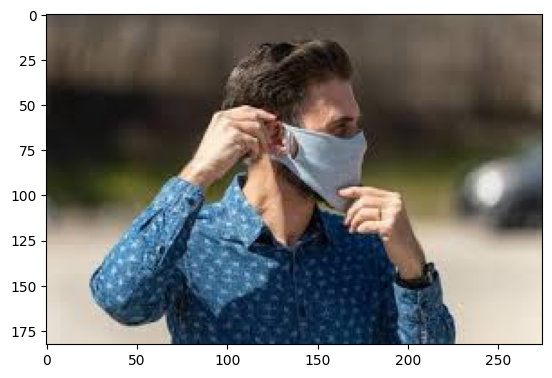

In [ ]:
img = mpimg.imread('/content/data/with_mask/with_mask_2590.jpg')
img_plot = plt.imshow(img)
plt.show()

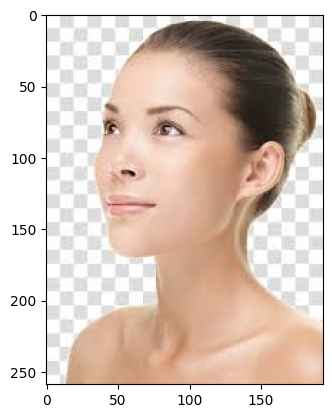

In [ ]:
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
img_plot = plt.imshow(img)
plt.show()

In [ ]:
#convert image to numpy arrays
with_mask_path = '/content/data/with_mask/'
data = []
for img_file in with_mask_files:
  image = Image.open(with_mask_path+img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'
for img_file in without_mask_files:
  image = Image.open(without_mask_path+img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[77, 49, 46],
        [79, 51, 48],
        [81, 53, 49],
        ...,
        [64, 48, 61],
        [69, 53, 66],
        [74, 58, 71]],

       [[82, 52, 50],
        [84, 54, 51],
        [85, 56, 52],
        ...,
        [74, 57, 73],
        [72, 56, 70],
        [71, 55, 68]],

       [[89, 57, 54],
        [89, 57, 53],
        [89, 57, 51],
        ...,
        [82, 65, 83],
        [76, 59, 77],
        [69, 52, 68]],

       ...,

       [[77, 77, 79],
        [79, 79, 81],
        [80, 80, 82],
        ...,
        [52, 55, 72],
        [49, 52, 69],
        [48, 51, 68]],

       [[88, 88, 90],
        [88, 88, 90],
        [86, 86, 88],
        ...,
        [39, 42, 59],
        [36, 39, 56],
        [36, 39, 56]],

       [[91, 91, 93],
        [88, 88, 90],
        [84, 84, 86],
        ...,
        [34, 37, 52],
        [33, 36, 51],
        [34, 37, 52]]], dtype=uint8)
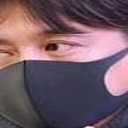

In [ ]:
data[2070]

In [ ]:
type(data[0])


numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
#converting image list and label list to numpy array..

x = np.array(data)
y = np.array(labels)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

In [ ]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(y)

[1 1 1 ... 0 0 0]


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
#Scaling the data
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [ ]:
x_train_scaled[0]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.2745098 , 0.28235294, 0.22745098],
        [0.27058824, 0.27843137, 0.22352941],
        [0.27058824, 0.27843137, 0.22352941]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.26666667, 0.2745098 , 0.21960784],
        [0.2745098 , 0.28235294, 0.22745098],
        [0.27843137, 0.28627451, 0.23137255]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.25098039, 0.25882353, 0.20392157],
        [0.27058824, 0.27843137, 0.22352941],
        [0.27843137, 0.29019608, 0.23137255]],

       ...,

       [[0.04313725, 0.05882353, 0.        ],
        [0.03921569, 0.05490196, 0.        ],
        [0.03529412, 0

In [ ]:
#Building convolution neural network

import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#compile the neural network

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
#trianing the neural network

history = model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - acc: 0.6697 - loss: 1.1447 - val_acc: 0.8777 - val_loss: 0.2984
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - acc: 0.8671 - loss: 0.3432 - val_acc: 0.8876 - val_loss: 0.2463
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.8928 - loss: 0.2790 - val_acc: 0.9008 - val_loss: 0.2141
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9066 - loss: 0.2342 - val_acc: 0.9008 - val_loss: 0.2221
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9258 - loss: 0.1874 - val_acc: 0.9107 - val_loss: 0.2086


In [ ]:
loss,accuracy = model.evaluate(x_test_scaled,y_test)
print('Test Accuracy =',accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.9240 - loss: 0.2152
Test Accuracy = 0.9146260619163513


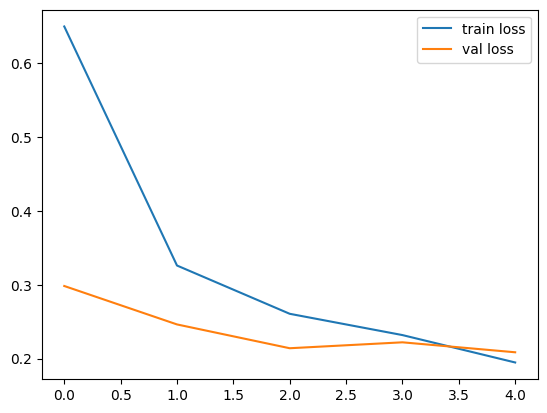

In [ ]:
h = history

plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()

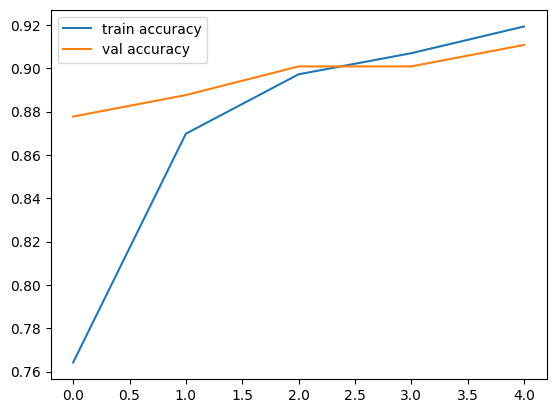

In [ ]:
plt.plot(h.history['acc'], label = 'train accuracy')
plt.plot(h.history['val_acc'], label = 'val accuracy')
plt.legend()
plt.show()

Enter the path of the image to predict: vdkms.jpg


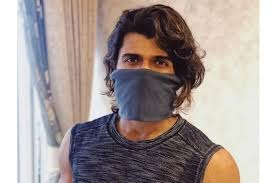

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.4399346 0.4525289]]
1
The person in the image is wearing mask


In [ ]:
#predictive system

input_image_path = input('Enter the path of the image to predict: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image,(128,128))
input_image_scaled = input_image_resize/255
input_image_reshaped = np.reshape(input_image_scaled,(1,128,128,3))
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing mask')
else:
  print('The person in the image is not wearing mask')
